In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px 
import numpy as np
import matplotlib as mb

In [3]:
df=pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### *Questions to Explore*
1. *Sales Analysis*:
   - What is the total sales revenue (Total Amount) over time?
   - Which Product Category generates the most revenue?
   - What is the average Price per Unit for each product category?
   - How does sales revenue vary by Gender?

In [47]:
# Group by date and calculate total sales
sales_over_time = df.groupby('Date')['Total Amount'].sum()
sales_over_time

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

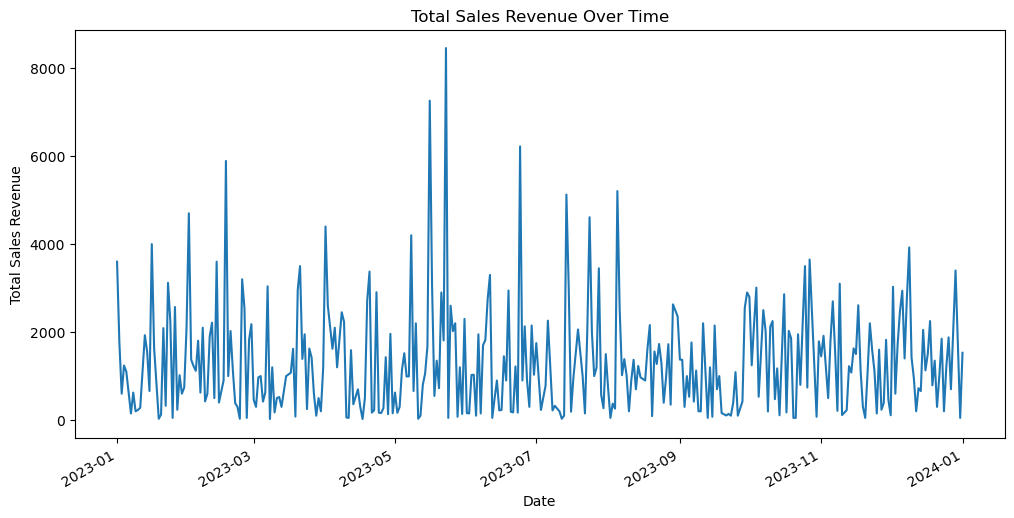

In [49]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.show()

In [25]:
# Group by product category and calculate total revenue
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum()
revenue_by_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

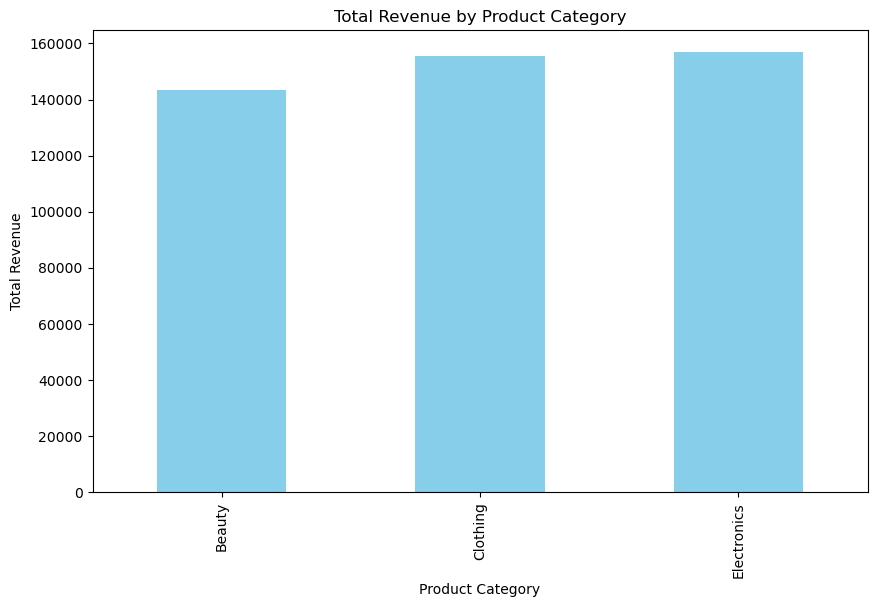

In [27]:
# Plot
plt.figure(figsize=(10, 6))
revenue_by_category.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

In [31]:
# Group by product category and calculate average price
avg_price_by_category = df.groupby('Product Category')['Price per Unit'].mean()
avg_price_by_category

Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64

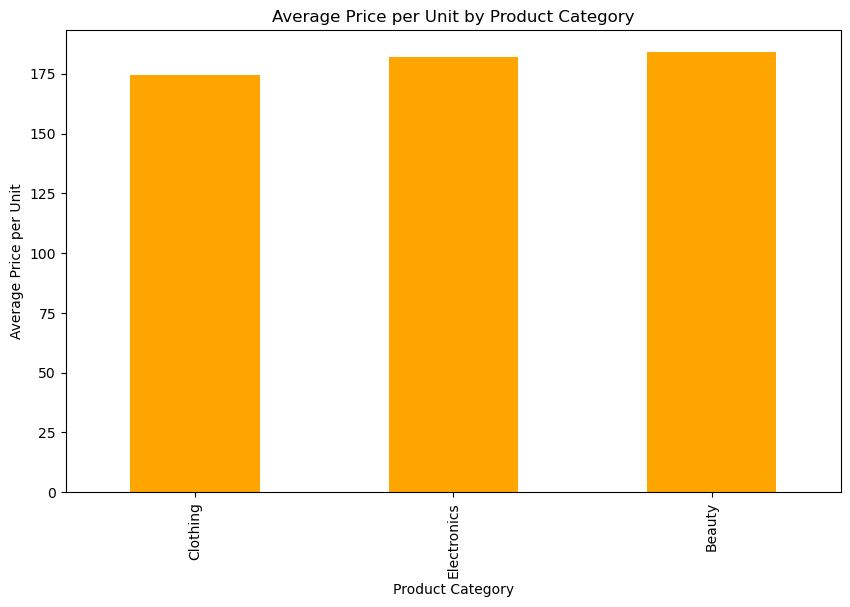

In [35]:
# Plot
plt.figure(figsize=(10, 6))
avg_price_by_category.sort_values().plot(kind='bar', color='orange')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price per Unit')
plt.show()

### *1. Sales Analysis*
#### **Q1: What is the total sales revenue (Total Amount) over time?**
- *Answer*: The total sales revenue over time can be visualized using a line plot. The plot shows trends in sales, such as peaks during specific months or seasons (e.g., holiday seasons like December)
#### **Q2: Which Product Category generates the most revenue?**
- *Answer*: The bar plot of revenue by product category reveals which category contributes the most to total revenue. For example, if "Electronics" has the highest bar, it means this category generates the most revenue
#### **Q3: What is the average Price per Unit for each product category?**
- *Answer*: The average price per unit varies by product category. A bar plot shows this comparison, helping identify which categories are more expensive (e.g., "Luxury Goods" might have a higher average price than "Clothing").
#### **Q4: How does sales revenue vary by Gender?**
- *Answer*: By grouping sales revenue by gender, we can determine if one gender spends more than the other. For example, if female customers contribute more to revenue, this could indicate a target demographic.

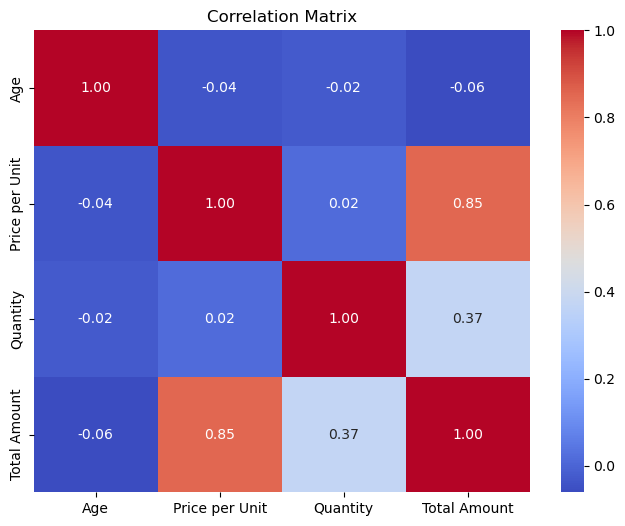

In [71]:
# Select relevant columns for correlation analysis
correlation_data = df[['Age', 'Price per Unit', 'Quantity', 'Total Amount']]
# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

2. *Customer Analysis*:
   - What is the distribution of customers by Age and Gender?
   - Which age group spends the most money?
   - How many unique customers are there, and how often do they make purchases?

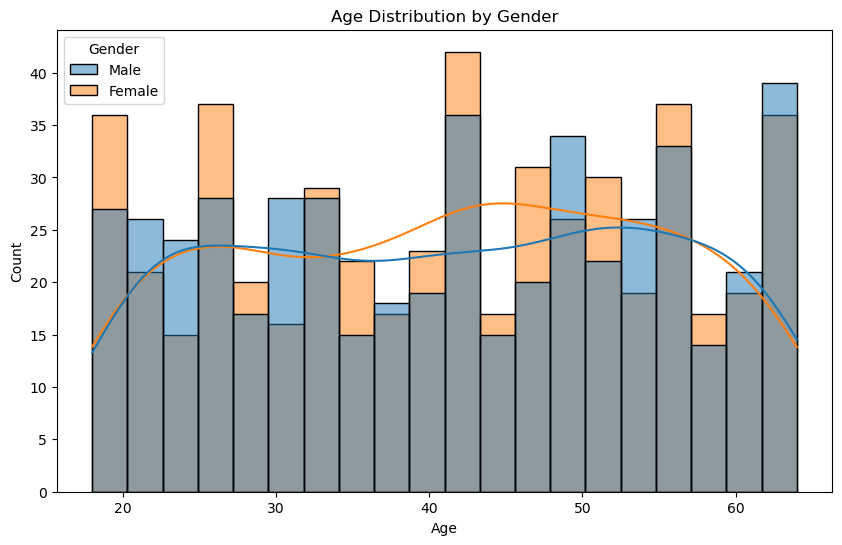

In [39]:
# Plot age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\ferow\AppData\Local\Temp\ipykernel_24980\3015742091.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_spending, x='Segment', palette='Set2')


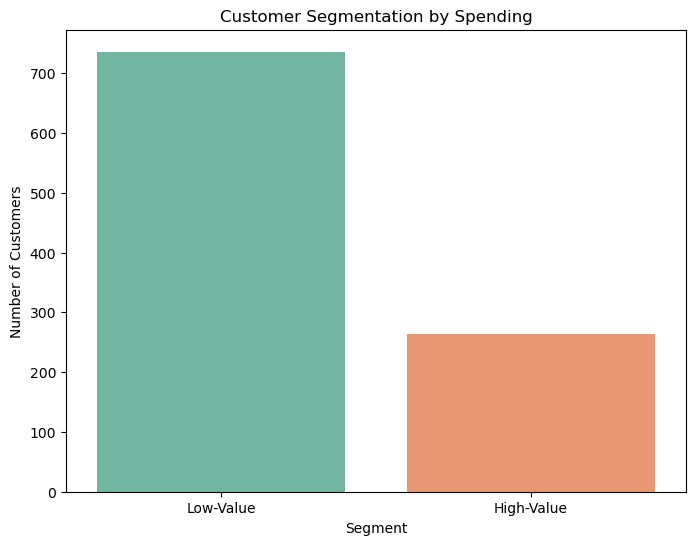

    Customer ID  Total Amount     Segment
487     CUST487          2000  High-Value
476     CUST476          2000  High-Value
773     CUST773          2000  High-Value
503     CUST503          2000  High-Value
92      CUST093          2000  High-Value
88      CUST089          2000  High-Value
946     CUST946          2000  High-Value
157     CUST157          2000  High-Value
155     CUST155          2000  High-Value
420     CUST420          2000  High-Value


In [65]:
# Group by customer and calculate total spending
customer_spending = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
customer_spending

# Segment customers into high-value and low-value
high_value_threshold = customer_spending['Total Amount'].quantile(0.75)  # Top 25% of spenders
customer_spending['Segment'] = customer_spending['Total Amount'].apply(
    lambda x: 'High-Value' if x >= high_value_threshold else 'Low-Value'
)
high_value_threshold

# Plot customer segmentation
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_spending, x='Segment', palette='Set2')
plt.title('Customer Segmentation by Spending')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Display top 10 high-value customers
top_10_customers = customer_spending.sort_values(by='Total Amount', ascending=False).head(10)
print(top_10_customers)

In [61]:
# Group by customer and calculate total spending
customer_spending = df.groupby('Customer ID')['Total Amount'].sum()
customer_spending

Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64

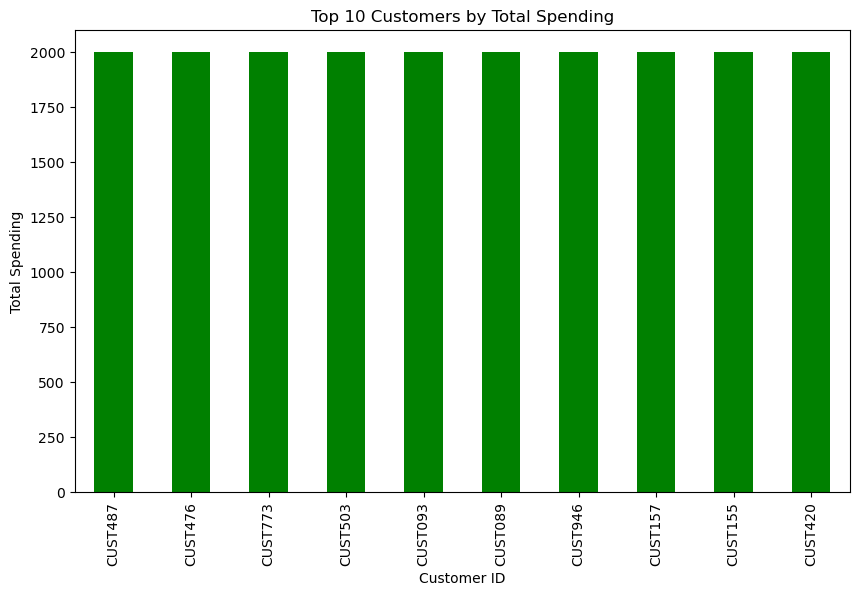

In [63]:
# Plot top 10 customers by spending
plt.figure(figsize=(10, 6))
customer_spending.sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

### *2. Customer Analysis*
#### **Q1: What is the distribution of customers by Age and Gender?**
- *Answer*: A histogram or density plot shows the age distribution of customers, segmented by gender. For example, if most customers are between 25-40 years old, this age group is the primary target audience.
#### *Q2: Which age group spends the most money?*
- *Answer*: By grouping Total Amount by age, we can identify which age group has the highest spending. For instance, customers aged 30-40 might spend the most.
#### *Q3: How many unique customers are there, and how often do they make purchases?*
- *Answer*: The number of unique customers can be calculated using df['Customer ID'].nunique(). Purchase frequency can be analyzed by counting transactions per customer.

3. *Transaction Analysis*:
   - What is the average Quantity purchased per transaction?
   - What is the distribution of Total Amount per transaction?
   - Are there any trends in sales over time (e.g., monthly or yearly)?

In [79]:
average_quantity_by_category = df.groupby('Product Category')['Quantity'].mean()
average_quantity_by_category

Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64

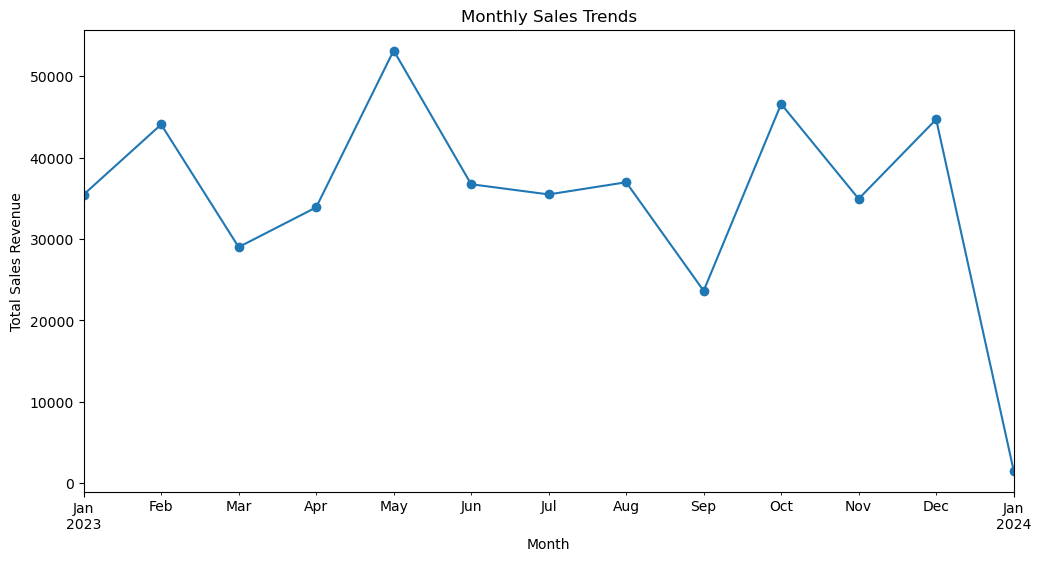

In [41]:
# Extract month and year from the date
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['Total Amount'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.show()

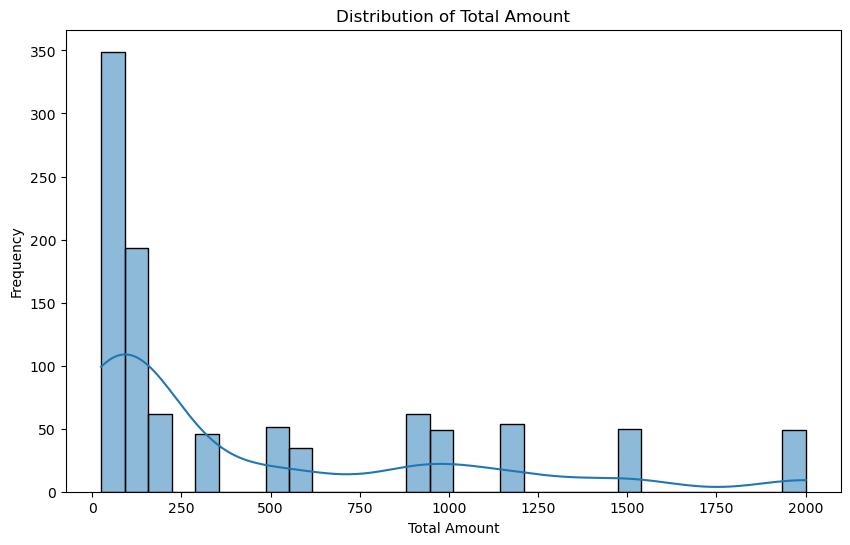

In [45]:
# Plot distribution of total amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], kde=True, bins=30)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

### *3. Transaction Analysis*
#### **Q1: What is the average Quantity purchased per transaction?**
- *Answer*: The average quantity per transaction can be calculated using df['Quantity'].mean(). This helps understand how many items customers typically buy in a single transaction.
#### **Q2: What is the distribution of Total Amount per transaction?**
- *Answer*: A histogram of Total Amount shows the distribution of transaction values. For example, most transactions might fall in the $50-$100 range.
#### *Q3: Are there any trends in sales over time (e.g., monthly or yearly)?*
- *Answer*: Monthly sales trends can be visualized using a line plot. Peaks in specific months (e.g., December) indicate seasonal trends.

4. *Product Analysis*:
   - Which product category has the highest Quantity sold?
   - What is the relationship between Price per Unit and Quantity sold?

In [81]:
# Group by 'Product Category' and sum the 'Quantity'
quantity_by_category = df.groupby('Product Category')['Quantity'].sum()

# Find the category with the highest quantity sold
highest_quantity_category = quantity_by_category.idxmax()
highest_quantity = quantity_by_category.max()

# Print the result
print(f"The product category with the highest quantity sold is '{highest_quantity_category}' with {highest_quantity} units sold.")

The product category with the highest quantity sold is 'Clothing' with 894 units sold.


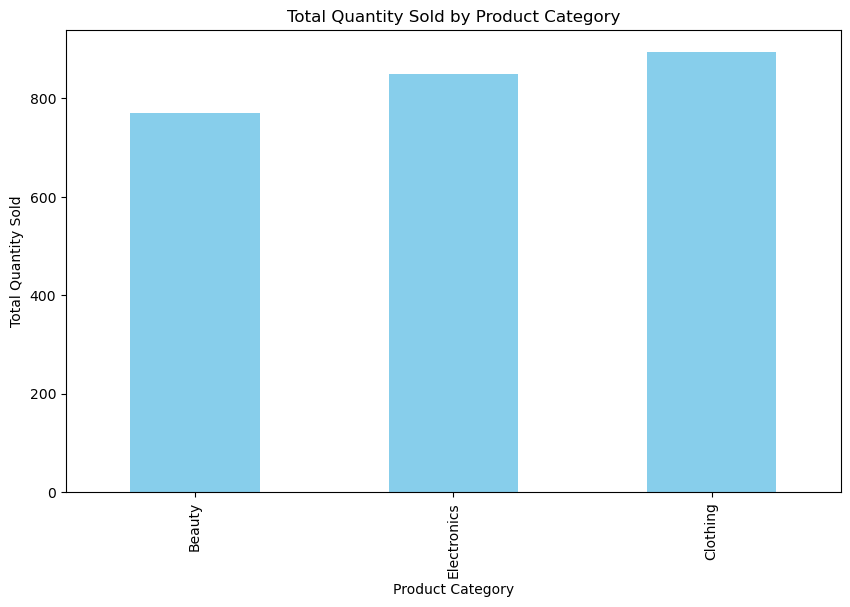

In [83]:
# Plot the total quantity sold by product category
plt.figure(figsize=(10, 6))
quantity_by_category.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

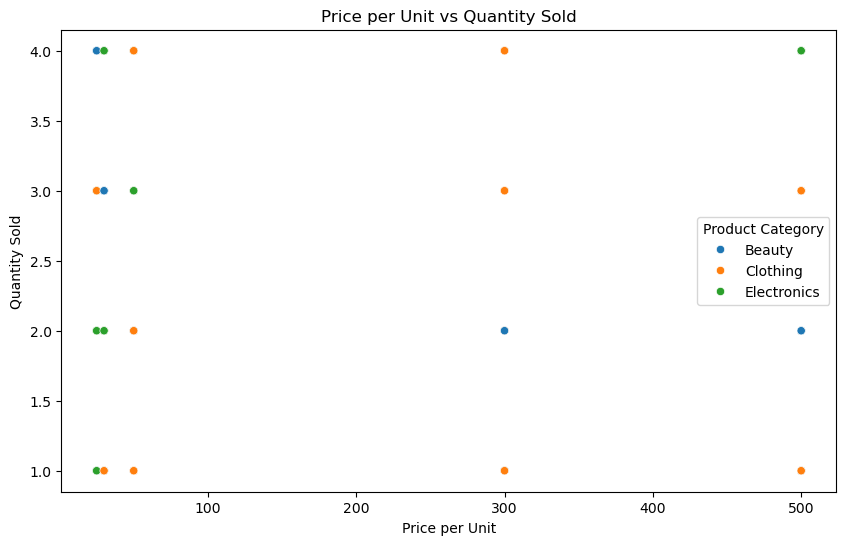

In [43]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', hue='Product Category')
plt.title('Price per Unit vs Quantity Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.show()

### *4. Product Analysis*
#### **Q1: Which product category has the highest Quantity sold?**
- *Answer*: By grouping Quantity by product category, we can identify which category sells the most units. For example, "Clothing" might have the highest quantity sold.
#### **Q2: What is the relationship between Price per Unit and Quantity sold?**
- *Answer*: A scatter plot of Price per Unit vs. Quantity shows if higher-priced items sell less (negative correlation) or if there’s no clear relationship